#### **Project 3- Predicting Remaining Useful Life**
<br>**Amit Saxena**

In [1]:
# Importing the necessary libraries-

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scipy as sp
from numpy import quantile, where, random


from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

### **Import Data**

In [2]:
# Setting the column names-

index_col_names=['unit_id','time_cycle']
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names
print(all_col)

['unit_id', 'time_cycle', 'oper_set1', 'oper_set2', 'oper_set3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']


In [3]:
# Importing the data from the training file-

train_df=pd.read_csv('train_FD004.txt',
                     delim_whitespace=True,names=all_col)
train_df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [4]:
# Filtering the data for unit id = 1-

train_df[train_df.unit_id==1]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,317,0.0014,0.0014,100.0,518.67,643.45,1599.21,1416.74,14.62,...,534.10,2388.47,8184.95,8.2760,0.03,396,2388,100.00,39.58,23.6562
317,1,318,10.0046,0.2500,100.0,489.05,605.56,1509.31,1324.42,10.52,...,380.60,2388.74,8179.79,8.4656,0.03,374,2319,100.00,28.77,17.4422
318,1,319,10.0009,0.2520,100.0,489.05,605.29,1512.36,1317.11,10.52,...,380.60,2388.81,8177.70,8.4545,0.03,373,2319,100.00,28.87,17.4126
319,1,320,20.0060,0.7002,100.0,491.19,607.24,1496.88,1266.21,9.35,...,323.53,2388.87,8108.60,9.0019,0.03,368,2324,100.00,24.90,15.0215


In [5]:
# Importing the data from the test data file-

test_df=pd.read_csv('test_FD004.txt',delim_whitespace=True,names=all_col)
test_df

# Importing the data from the RUL data file-

y_true=pd.read_csv('RUL_FD004.txt',delim_whitespace=True,names=['RUL'])
y_true['unit_id']=y_true.index+1
y_true

,RUL,unit_id
0,22,1
1,39,2
2,107,3
3,75,4
4,149,5
...,...,...
243,35,244
244,131,245
245,194,246
246,112,247


#### **Compute Remaining Useful Life:**
We'll first obtain the maximum time cycle for each unit id and then find the difference in the current time cycle and the max. time cycle.

To find the Maximum time cycle for each unit id of the training data, we need to group the data by unit id and filter by time cycle. Then, we create a data frame composed of two columns, where a maximum time cycle corresponds to a unique unit id.

In [6]:
# Finding maximum time cycle for each unit-

max_time_cycle=train_df.groupby('unit_id')['time_cycle'].max()
max_time_cycle
rul = pd.DataFrame(max_time_cycle).reset_index()
rul.columns = ['unit_id', 'max']
rul.head()

,unit_id,max
0,1,321
1,2,299
2,3,307
3,4,274
4,5,193


In [7]:
# Deducting the max. time cycle by the current time cycle of the units-
# Merge the datasets and add RUL as the target variable-

train_df = train_df.merge(rul, on=['unit_id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['time_cycle']
train_df.drop('max', axis=1, inplace=True)
train_df[train_df.unit_id==1].iloc[:,[1,-1]]

,time_cycle,RUL
0,1,320
1,2,319
2,3,318
3,4,317
4,5,316
...,...,...
316,317,4
317,318,3
318,319,2
319,320,1


In [8]:
# Adding the RUL column for the test data-
# Assigning the RUL value to the last row of each unit id, and in each row above add one 
## until the first time cycle of that particular engine-

test_df['RUL']=0
for i in range(1,101):
    test_df.loc[test_df.unit_id==i,'RUL']=range(int(y_true.RUL[y_true.unit_id==i])+len(test_df[test_df.unit_id==i])-1,
                                                int(y_true.RUL[y_true.unit_id==i])-1,-1)
    
test_df.iloc[:,[0,1,-1]] 

,unit_id,time_cycle,RUL
0,1,1,251
1,1,2,250
2,1,3,249
3,1,4,248
4,1,5,247
...,...,...,...
41209,248,277,0
41210,248,278,0
41211,248,279,0
41212,248,280,0


In [9]:
# Checking if the calculation is correct by comparing the RUL values and the test data for a unit id (5)-

y_true
test_df.loc[test_df.unit_id==5,['unit_id','time_cycle','RUL']]

,unit_id,time_cycle,RUL
732,5,1,199
733,5,2,198
734,5,3,197
735,5,4,196
736,5,5,195
737,5,6,194
738,5,7,193
739,5,8,192
740,5,9,191
741,5,10,190


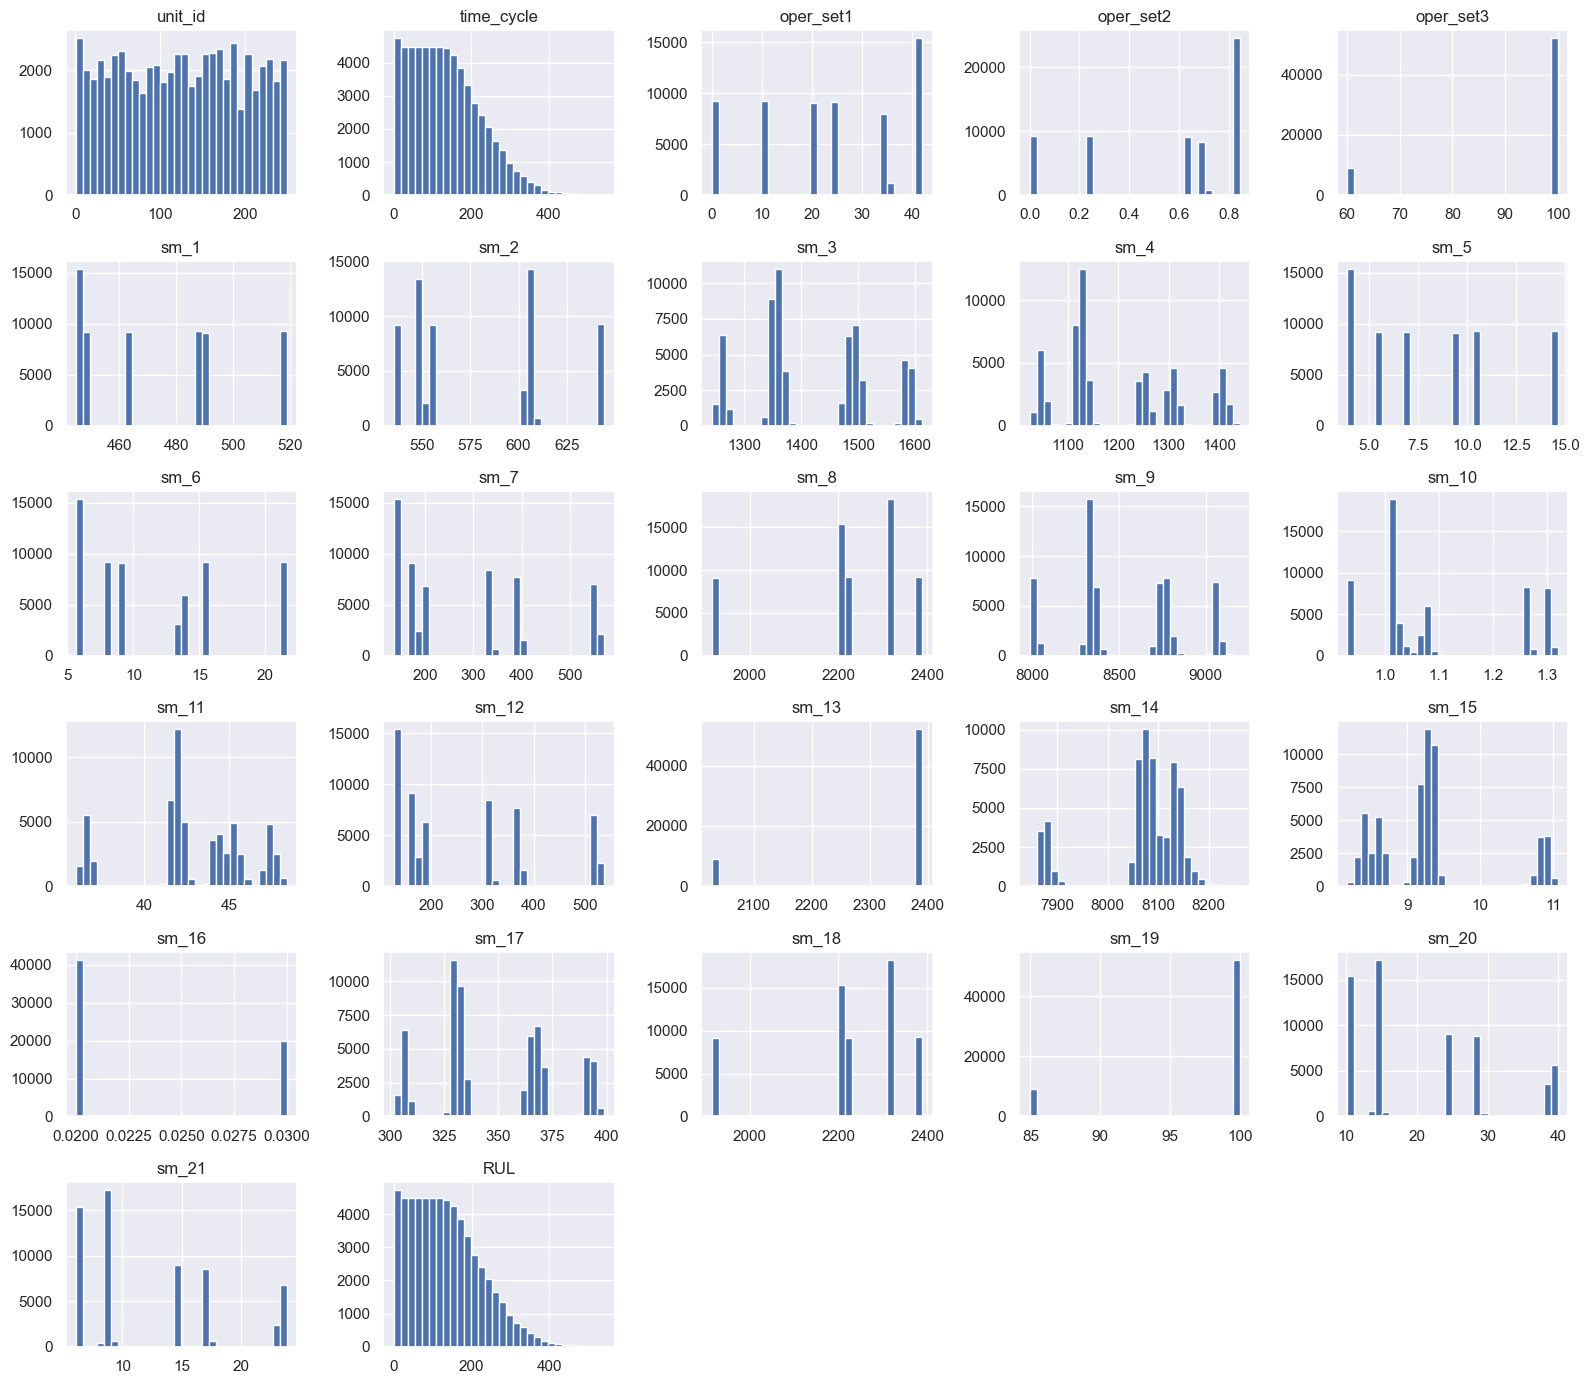

In [10]:
# Creating the histogram for each variable in the training set-

sns.set(font_scale=1) 
train_df.hist(bins=30, figsize=(16,14), color='b')
plt.tight_layout()
plt.show()

In [11]:
# Checking the correlation matrix of the features of the data set-

train_df.iloc[:,1:-1].corr()

,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
time_cycle,1.000000,0.000301,0.001033,-0.001814,-0.000688,0.002504,0.023167,0.029306,-0.000489,-0.001291,...,0.005094,-0.000922,0.097872,-0.027760,0.044364,0.022909,-0.001803,-0.001814,0.002463,0.002475
oper_set1,0.000301,1.000000,0.943796,-0.028425,-0.964754,-0.868390,-0.787848,-0.839988,-0.987382,-0.976518,...,-0.951158,-0.028443,-0.263960,0.460800,-0.840823,-0.790694,-0.444336,-0.028425,-0.962043,-0.962052
oper_set2,0.001033,0.943796,1.000000,-0.066257,-0.886123,-0.811613,-0.761372,-0.837055,-0.933693,-0.929548,...,-0.918868,-0.066236,-0.356085,0.520309,-0.902160,-0.764491,-0.440552,-0.066257,-0.922004,-0.922000
oper_set3,-0.001814,-0.028425,-0.066257,1.000000,0.163835,0.478659,0.620181,0.544482,0.113471,0.197793,...,0.308038,0.999998,0.928067,-0.881196,0.290752,0.616473,0.902830,1.000000,0.276239,0.276147
sm_1,-0.000688,-0.964754,-0.886123,0.163835,1.000000,0.944439,0.870606,0.897421,0.986561,0.986539,...,0.972915,0.163834,0.353450,-0.542375,0.789447,0.872955,0.572078,0.163835,0.977777,0.977791
sm_2,0.002504,-0.868390,-0.811613,0.478659,0.944439,1.000000,0.981750,0.980722,0.916509,0.944587,...,0.969187,0.478666,0.624368,-0.776156,0.800320,0.982621,0.809591,0.478659,0.962824,0.962806
sm_3,0.023167,-0.787848,-0.761372,0.620181,0.870606,0.981750,1.000000,0.989744,0.842817,0.884586,...,0.929499,0.620227,0.755184,-0.875041,0.801512,0.998693,0.895021,0.620181,0.917055,0.917020
sm_4,0.029306,-0.839988,-0.837055,0.544482,0.897421,0.980722,0.989744,1.000000,0.883579,0.919064,...,0.956736,0.544531,0.719325,-0.846000,0.858554,0.990407,0.843615,0.544482,0.945999,0.945965
sm_5,-0.000489,-0.987382,-0.933693,0.113471,0.986561,0.916509,0.842817,0.883579,1.000000,0.996316,...,0.979416,0.113473,0.331134,-0.525064,0.824766,0.845583,0.524096,0.113471,0.985677,0.985696
sm_6,-0.001291,-0.976518,-0.929548,0.197793,0.986539,0.944587,0.884586,0.919064,0.996316,1.000000,...,0.993003,0.197794,0.408114,-0.594836,0.841052,0.887014,0.594169,0.197793,0.996289,0.996299


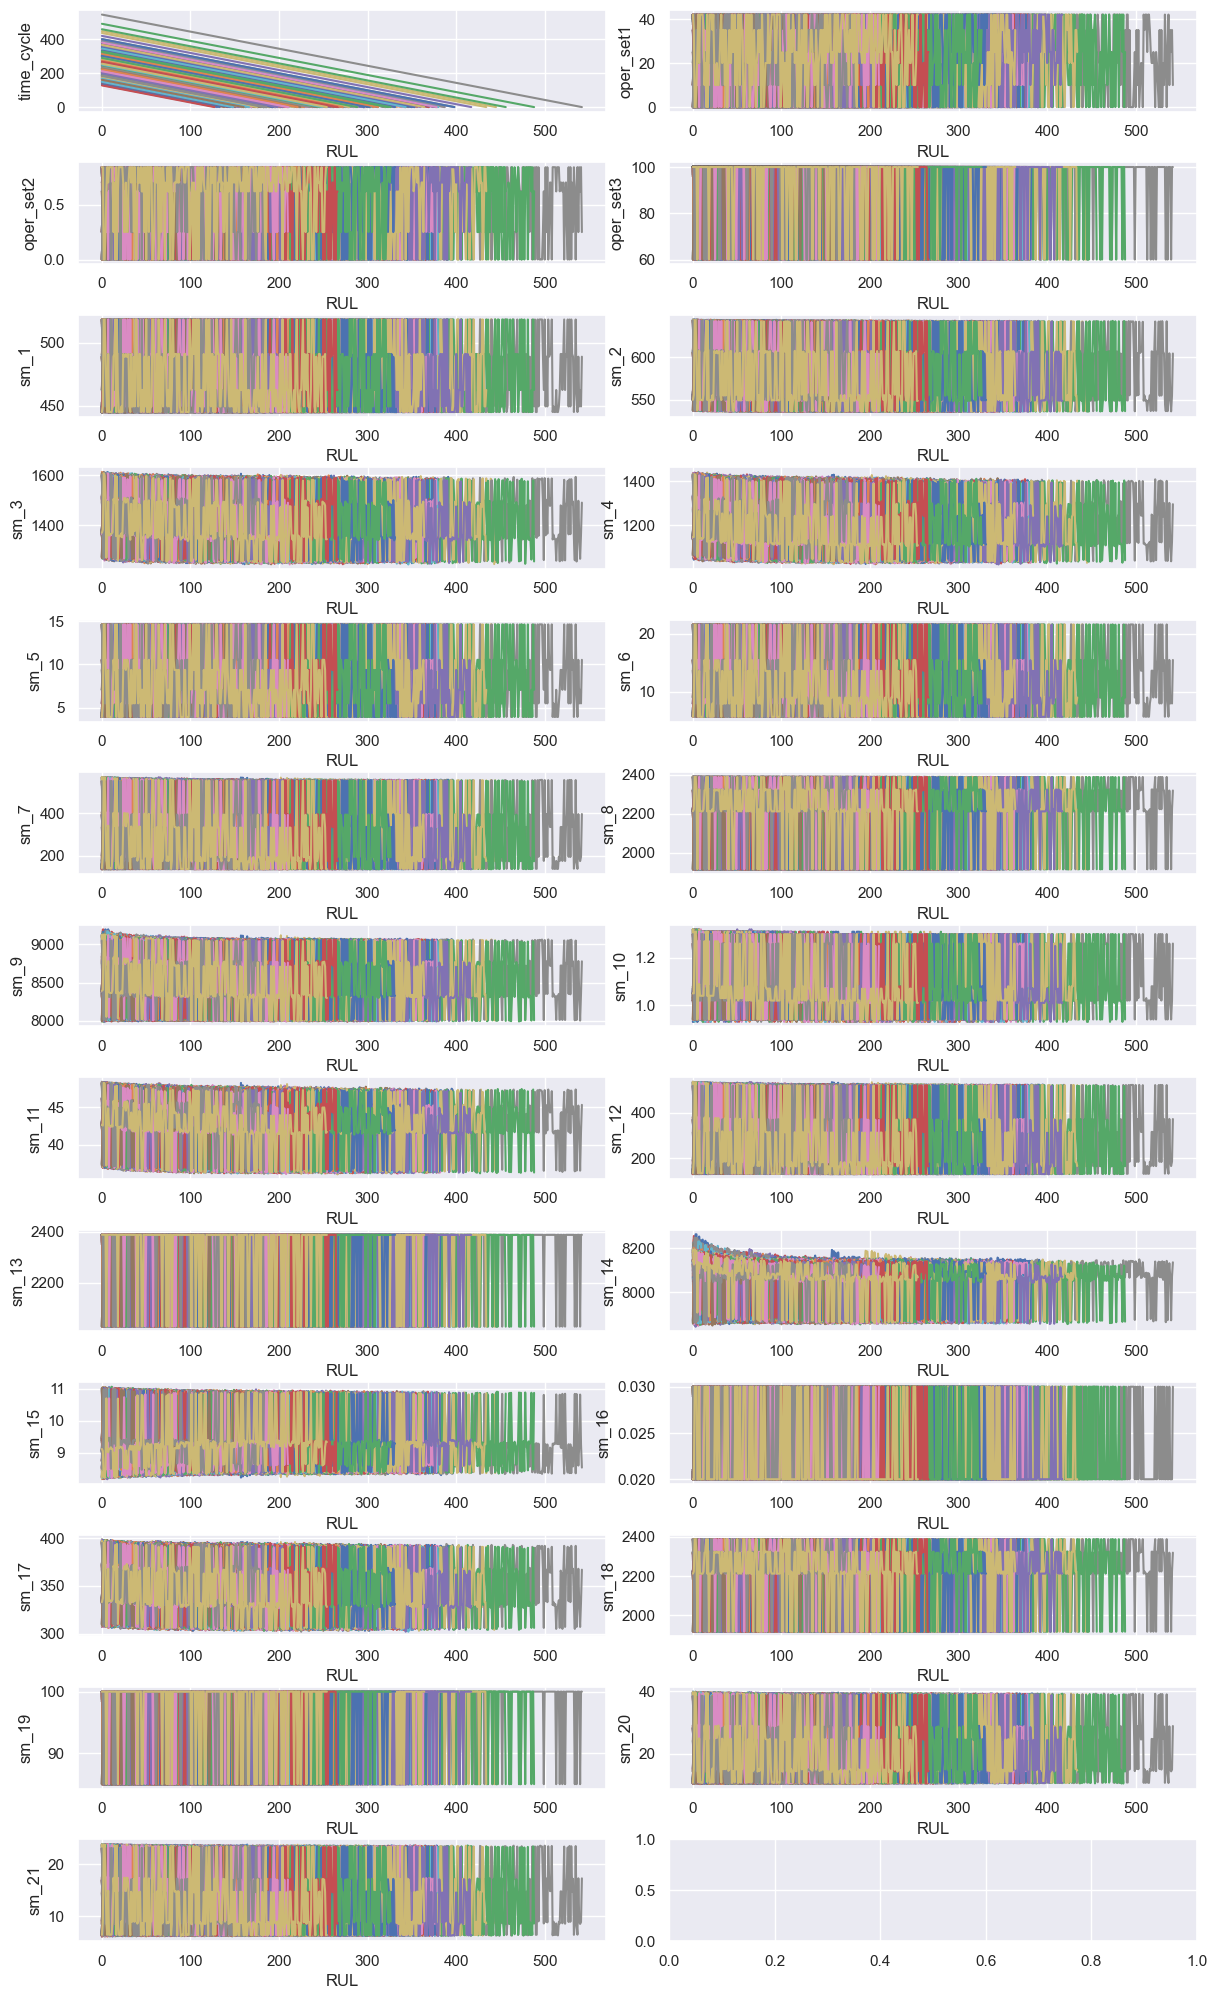

In [12]:
# Plotting the RUL in relationship with the feature variables-

fig,ax=plt.subplots(13,2,figsize=(12,20))
fig.tight_layout()
r,c=0,0
for v_idx,v in enumerate(all_col[1:]):
    for i in train_df['unit_id'].unique():
        ax[r][c].plot('RUL',v,data=train_df[train_df['unit_id']==i])
            
    ax[r][c].set_xlabel('RUL')
    ax[r][c].set_ylabel(v) 
    if c<1:
        c+=1
    elif c==1:
         r+=1
         c-=1

In [13]:
# Dropping the sensor measurements which don’t show significant change when the Remaining Useful Life changes-

cols_drop=['oper_set3','sm_1','sm_5','sm_6','sm_10','sm_14','sm_16','sm_18','sm_19']
train_df = train_df.drop(cols_drop, axis = 1)
test_df = test_df.drop(cols_drop, axis = 1)

### **Max-Min Normalization**
Once we selected only the significant features of the dataset, we can normalize the data. This step is important to avoid dependence on the choice of the measurement units. Indeed, the feature variables have different ranges of values and may reduce the performance of the model. A way is to transform the data to fall within a smaller range between -1 and 1. The technique applied is the max-min normalization, available in sklearn module.

In [14]:
# Scaling the features-

features=list(train_df.columns[1:-1])
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
train_df[features] = min_max_scaler.fit_transform(train_df[features])
test_df[features] = min_max_scaler.fit_transform(test_df[features])
test_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,-1.000000,-0.047458,0.662708,0.313122,0.308055,0.003114,-0.092794,0.726031,0.255157,0.278689,-0.095019,0.992033,-0.275578,0.263158,-0.043360,-0.032441,251
1,1,-0.995876,0.190173,0.472684,-0.985256,-0.917028,-0.967471,-0.822678,-0.998775,-0.977430,-0.986885,-0.826860,-0.998064,0.890651,-0.915789,-0.717480,-0.725240,250
2,1,-0.991753,0.999619,1.000000,-0.745485,-0.459617,-0.599664,-0.994089,0.254186,-0.443444,-0.100000,-0.991576,0.992973,-0.152506,-0.452632,-0.986450,-0.967067,249
3,1,-0.987629,0.999786,0.995724,-0.746222,-0.461960,-0.592842,-0.994597,0.254017,-0.451101,-0.065574,-0.994025,0.992697,-0.178528,-0.452632,-0.974932,-0.989663,248
4,1,-0.983505,0.666725,0.995249,-0.637302,-0.389284,-0.540736,-0.737342,0.299707,-0.398566,-0.132787,-0.737670,0.992531,-0.218628,-0.347368,-0.684282,-0.684775,247


In [15]:
# Dropping the 'unit_id' and 'RUL' features from the test and train data sets-
# Splitting the training and test sets into feature and target variables-

X_train = train_df.drop(['unit_id','RUL'],axis=1).values
y_train = train_df['RUL'].values
X_test = test_df.drop(['unit_id','RUL'],axis=1).values
y_test = test_df['RUL'].values

### **Predictive Model**
After the data prep, building a model on the training data. The chosen model is Gradient Boosting, which is an ensemble of decision trees. 

In [16]:
%%time

# Fitting the gradient boost regressor to the training data set-

reg = GradientBoostingRegressor(max_features='sqrt',n_estimators=1000,random_state=42)
reg.fit(X_train, y_train)

# Predicting and evaluating the results using RMSE-

y_hat_train = reg.predict(X_train)
print('Training RMSE: ',np.sqrt(mean_squared_error(y_train, y_hat_train)))

print()

y_hat_test = reg.predict(X_test)
print('Test RMSE: ',np.sqrt(mean_squared_error(y_test, y_hat_test)))

Training RMSE:  47.94142784444714

Test RMSE:  122.37832002965318
CPU times: user 1min 2s, sys: 62.2 ms, total: 1min 2s
Wall time: 1min 2s


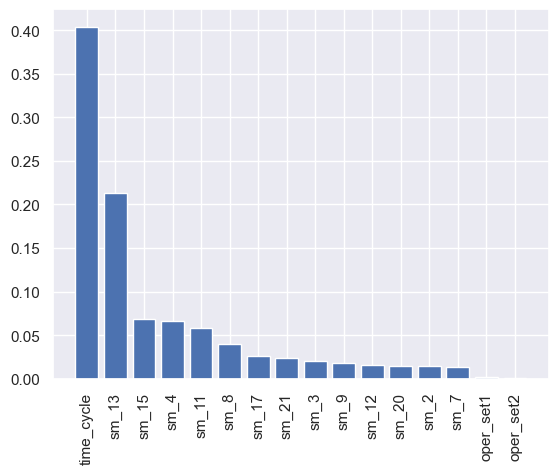

In [17]:
# Finding the features with maximum importance-

importances = reg.feature_importances_
sorted_index=np.argsort(importances)[::-1]
x=range(len(importances))
labels=np.array(train_df.drop(['unit_id','RUL'],axis=1).columns)[sorted_index]

# Plotting the bar chart with importance of features-

plt.bar(x,importances[sorted_index],tick_label=labels)

plt.xticks(rotation=90)
plt.show()

**To have a more impartial performance of the model would be to perform k-fold cross-validation. The idea is to divide the dataset into k parts, k-1 to train and the remaining one to test, allowing to avoid overfitting.**


In [18]:
%%time

# Dividing the dataset into 5 parts to avoid overfitting-

X = pd.concat([pd.DataFrame(X_train),pd.DataFrame(X_test)]).values
y = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)]).values.ravel()

gb = GradientBoostingRegressor(random_state=42)
cv = KFold(n_splits=5, random_state=0,shuffle=True)
scores={'RMSE':[]}

for train_index, test_index in cv.split(X, y.ravel()):
        xtrain, xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        gb.fit(xtrain, ytrain)
        pred = gb.predict(xtest)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest, pred)))
        
print('RMSE of the 5 splits: {}'.format(scores['RMSE']))        
print('Average RMSE: {}'.format(np.mean(scores['RMSE'])))  

RMSE of the 5 splits: [78.85404322784076, 79.68107819323654, 79.16824419528918, 78.71877570247578, 79.78788450821283]
Average RMSE: 79.24200516541102
CPU times: user 2min 46s, sys: 179 ms, total: 2min 46s
Wall time: 2min 48s


**The average root mean squared error is now better than the one obtained before (64.99).**

****
****